Test Accuracy (Logistic Regression): 71.31%
Classification Report (Logistic Regression):
                 precision    recall  f1-score   support

      Positive       0.84      0.90      0.87       675
      Negative       0.70      0.64      0.67       623
  Not_relevant       0.67      0.71      0.69       619
Mixed Feelings       0.63      0.64      0.64       627
       Neutral       0.70      0.66      0.68       600

      accuracy                           0.71      3144
     macro avg       0.71      0.71      0.71      3144
  weighted avg       0.71      0.71      0.71      3144



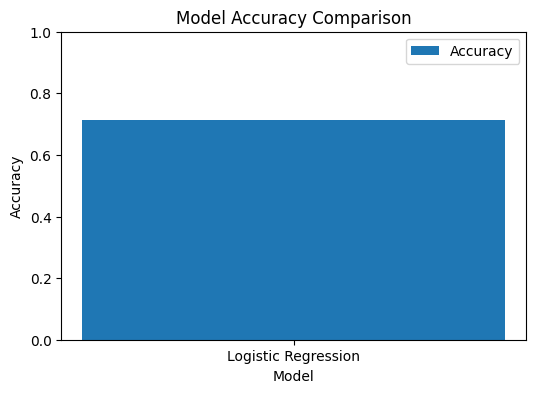

In [10]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.utils import resample
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt

# Load data from CSV
file_path = 'final_manglish.csv'  # Replace with your file path
data = pd.read_csv(file_path)

# Ensure 'commentText' column contains strings
data['commentText'] = data['commentText'].astype(str)

# Function to convert sentiment labels to numerical values
sentiment_dict = {
    'Positive': 0,
    'Negative': 1,
    'Not_relevant': 2,
    'Mixed Feelings': 3,
    'Neutral': 4
}

data['Sentiment_Class'] = data['Sentiment_Class'].map(sentiment_dict)

# Tokenization and sequence padding
max_words = 1000
max_seq_length = 100
vectorizer = CountVectorizer(max_features=max_words)
X = vectorizer.fit_transform(data['commentText'])
y = data['Sentiment_Class']

# Upsample minority classes to match the size of the majority class
data_upsampled = pd.concat([
    resample(data[data['Sentiment_Class'] == sentiment_dict['Positive']], replace=True, n_samples=len(data[data['Sentiment_Class'] == sentiment_dict['Not_relevant']])),
    resample(data[data['Sentiment_Class'] == sentiment_dict['Negative']], replace=True, n_samples=len(data[data['Sentiment_Class'] == sentiment_dict['Not_relevant']])),
    resample(data[data['Sentiment_Class'] == sentiment_dict['Not_relevant']], replace=True, n_samples=len(data[data['Sentiment_Class'] == sentiment_dict['Not_relevant']])),
    resample(data[data['Sentiment_Class'] == sentiment_dict['Mixed Feelings']], replace=True, n_samples=len(data[data['Sentiment_Class'] == sentiment_dict['Not_relevant']])),
    resample(data[data['Sentiment_Class'] == sentiment_dict['Neutral']], replace=True, n_samples=len(data[data['Sentiment_Class'] == sentiment_dict['Not_relevant']]))
])

# Tokenization and sequence padding for balanced data
X_upsampled = vectorizer.fit_transform(data_upsampled['commentText'])
y_upsampled = data_upsampled['Sentiment_Class']

# Split the upsampled data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_upsampled, y_upsampled, test_size=0.1, random_state=40)

# Build and train Logistic Regression model
lr_model = LogisticRegression(max_iter=1000, random_state=40)  # You can adjust the maximum number of iterations as needed
lr_model.fit(X_train, y_train)

# Evaluate the Logistic Regression model on test data
y_pred_lr = lr_model.predict(X_test)
accuracy_lr = accuracy_score(y_test, y_pred_lr)
print(f"Test Accuracy (Logistic Regression): {accuracy_lr * 100:.2f}%")

# Generate predictions for Logistic Regression
reverse_sentiment_dict = {v: k for k, v in sentiment_dict.items()}
y_test_labels = [reverse_sentiment_dict[label] for label in y_test]
y_pred_labels_lr = [reverse_sentiment_dict[label] for label in y_pred_lr]

# Print complete classification report for Logistic Regression
print("Classification Report (Logistic Regression):\n", classification_report(y_test_labels, y_pred_labels_lr, target_names=sentiment_dict.keys()))

# Plotting the accuracy comparison (Logistic Regression only)
plt.figure(figsize=(6, 4))
plt.bar(['Logistic Regression'], [accuracy_lr], width=0.4, label='Accuracy')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison')
plt.ylim(0, 1)
plt.legend()
plt.show()
